# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score

## Load the Data

In [145]:
df = pd.read_csv('Datasets\Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [146]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52000.0,52309.605596,30282.566278,0.000000,25924.750000,52285.500000,78552.250000,104949.000000
Location_Easting_OSGR,52000.0,439654.064615,66711.811588,296780.000000,388110.000000,429505.000000,516010.000000,559570.000000
Location_Northing_OSGR,52000.0,338794.330769,115731.113185,156110.000000,194160.000000,361950.000000,415952.500000,656390.000000
Longitude,52000.0,-1.425829,0.975537,-3.596752,-2.179555,-1.552874,-0.312861,0.350177
Latitude,52000.0,52.940991,1.044812,51.289060,51.630849,53.149640,53.638514,55.800830
Police_Force,52000.0,11.101904,9.558172,1.000000,1.000000,10.000000,20.000000,48.000000
Accident_Severity,52000.0,2.848481,0.390890,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,51198.0,1.843060,0.708149,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,52000.0,1.358615,0.804162,1.000000,1.000000,1.000000,1.000000,23.000000
Day_of_Week,51463.0,4.120009,1.934134,1.000000,2.000000,4.000000,6.000000,7.000000


In [149]:
df.duplicated().sum()

0

In [150]:
df.isna().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

* PCA in Feature Selection

In [151]:
def remove_outliers(df,col):
    """
        remove_outliers(Data Frame , Column)
        removing all the outliers in the column
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in df.select_dtypes(exclude=['object']).columns:
    if col != 'Accident_Severity':
        df = remove_outliers(df,col)

In [152]:
# fill all NAN with mode 
for i in df.isna().sum().index:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [153]:
# Drop all duplicates in the DataFrame
df.drop_duplicates(inplace = True)

In [154]:
df.drop(columns=['Accident_Index','Unnamed: 0'])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
5,433640.0,406080.0,-1.493735,53.550272,14,3,1.0,1,17/11/2005,5.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01007445,2005.0
6,456990.0,340390.0,-1.153083,52.957841,31,2,1.0,1,06/10/2005,5.0,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Unknown,Normal,1.0,No,E01013813,2005.0
9,340060.0,556150.0,-2.936149,54.896491,3,3,1.0,1,17/03/2005,5.0,...,0.0,None within 50 metres,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01019204,2005.0
13,533390.0,172010.0,-0.082532,51.431344,1,3,1.0,1,23/11/2005,4.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01003947,2005.0
20,527240.0,180870.0,-0.167765,51.512383,1,2,3.0,1,23/12/2005,6.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01004680,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51980,531240.0,178880.0,-0.110894,51.493585,1,2,2.0,1,25/07/2005,2.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01003015,2005.0
51983,550610.0,191450.0,0.173305,51.601704,1,3,2.0,1,27/04/2005,4.0,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,E01002304,2005.0
51984,460040.0,452300.0,-1.086343,53.963304,12,2,2.0,1,24/06/2005,6.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01013366,2005.0
51988,511930.0,432660.0,-0.302875,53.778242,16,3,3.0,1,07/05/2005,7.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,E01012904,2005.0


In [155]:
# Check for NAN values
df.isna().sum().sum()

0

In [156]:
# Check for duplicated values
df.duplicated().sum()

0

In [157]:
# creating a new data frame contain only numeric columns
df1 = df.select_dtypes(include='number') 

In [158]:
# using Standard Scaler to prepare the data for the model
standardscaler = StandardScaler()
labelEncoder = LabelEncoder()
for col in df1.select_dtypes(exclude=['object']).columns:
    if col != 'Accident_Severity':
        df1[col] = standardscaler.fit_transform(df1[[col]])

In [159]:
# using LabelEncoder for all Data Frame instead of one hot encoder
for col in df1.select_dtypes(exclude=['object']).columns:
    df1[col] = labelEncoder.fit_transform(df1[[col]])

C:\Users\aabx9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aabx9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aabx9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [160]:
selected_features = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties','Accident_Severity','Speed_limit']
df_selected = df1[selected_features]

In [161]:
# Reduce dimensions using PCA
X = pd.DataFrame(df_selected).to_numpy()
Z = (X - X.mean()) / X.std()
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

Data frame df_vis is for Visualization only 
it is before the Data Preprocessing and the scaler

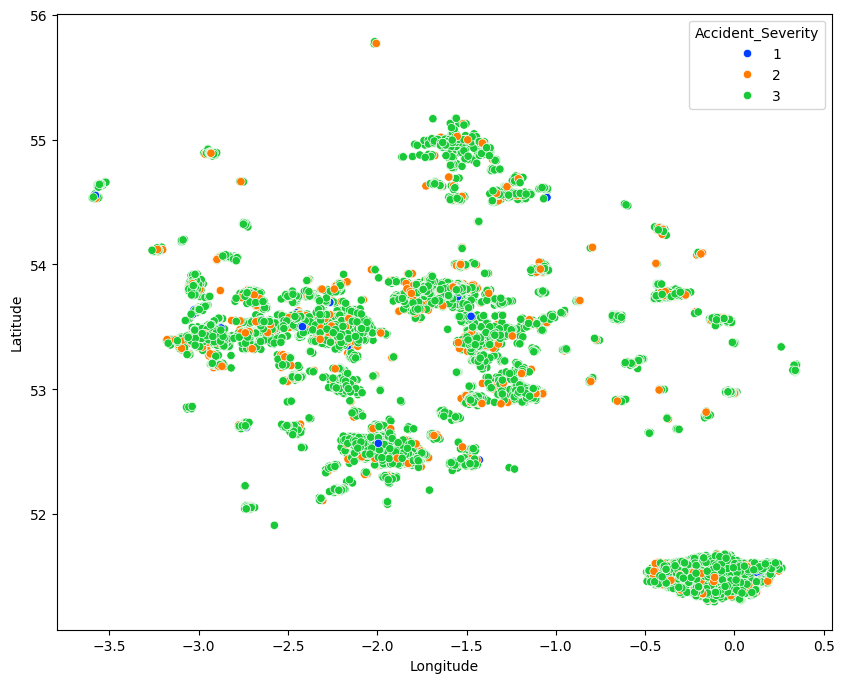

In [162]:
# Scatter plot of accident based on longitude and latitude
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='Accident_Severity',palette='bright')
plt.show()

C:\Users\aabx9\AppData\Local\Temp\ipykernel_9768\3527849911.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(data=df, x='Day_of_Week',hue='Accident_Severity',color='r')


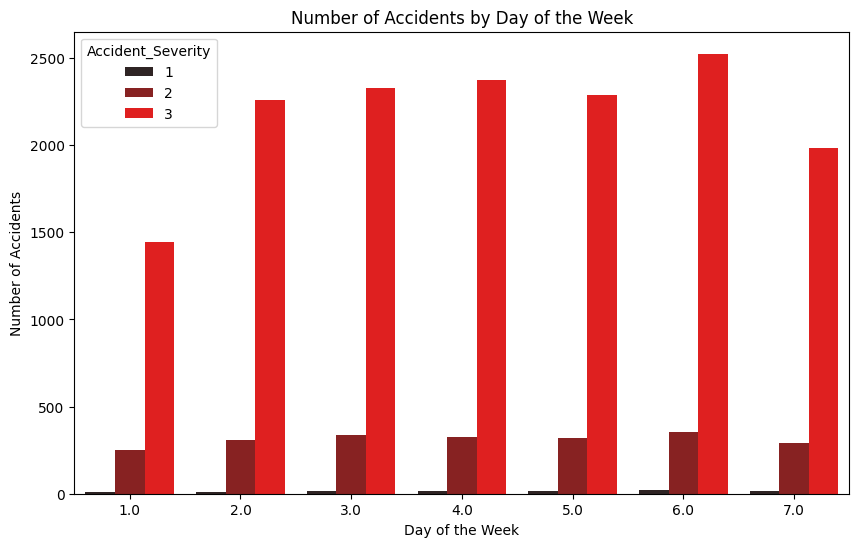

In [163]:
# Bar Plot of Number of Accidents by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_Week',hue='Accident_Severity',color='r')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


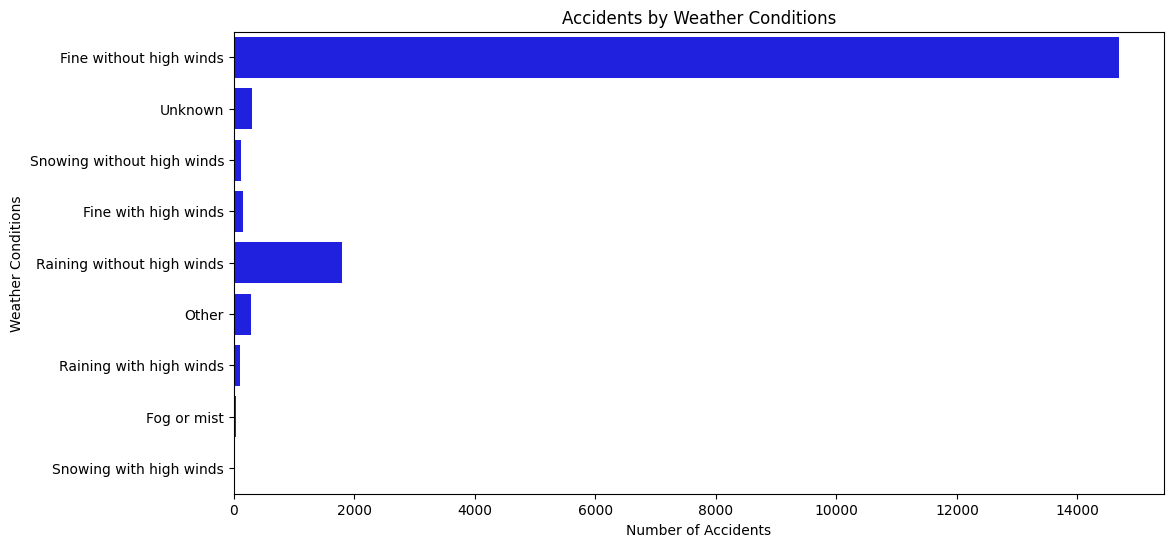

In [164]:
# Bar Plot of Accidents by Weather Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Weather_Conditions',orient='h',color='b')
plt.title('Accidents by Weather Conditions')
plt.ylabel('Weather Conditions')
plt.xlabel('Number of Accidents')
plt.show()


In [165]:
df1.head()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
5,12959,5178,7040,7615,12646,10,2,0,0,4,104,5,0,0,0,0,0,0
6,17184,6264,4605,9205,8931,18,1,0,0,4,164,5,0,0,2,0,0,0
9,6853,670,9835,770,16616,1,2,0,0,4,35,5,0,0,0,0,0,0
13,3009,8741,657,14193,1061,0,2,0,0,3,7,5,0,0,0,0,0,0
20,578,8148,1457,12341,3227,0,1,2,0,5,0,2,301,0,1,0,0,0


<Axes: >

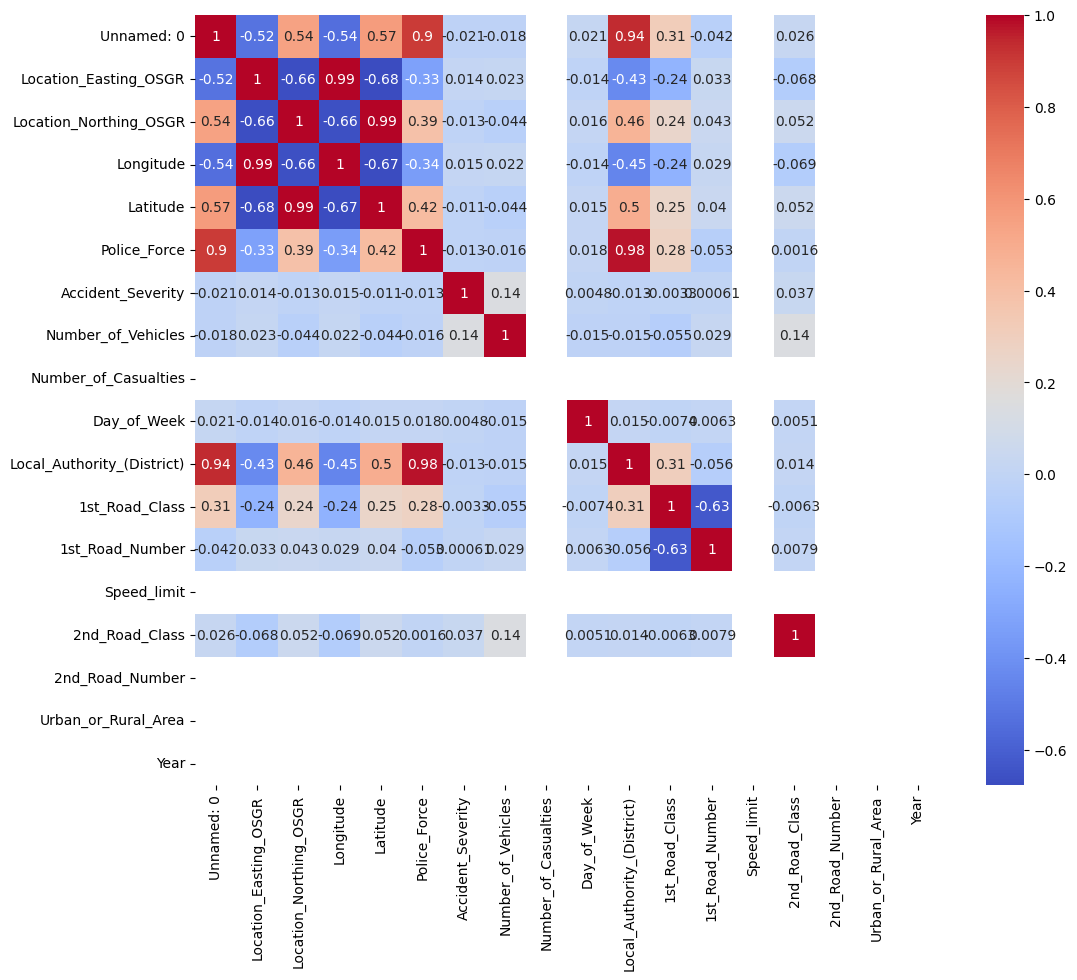

In [166]:
df_corr = df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')

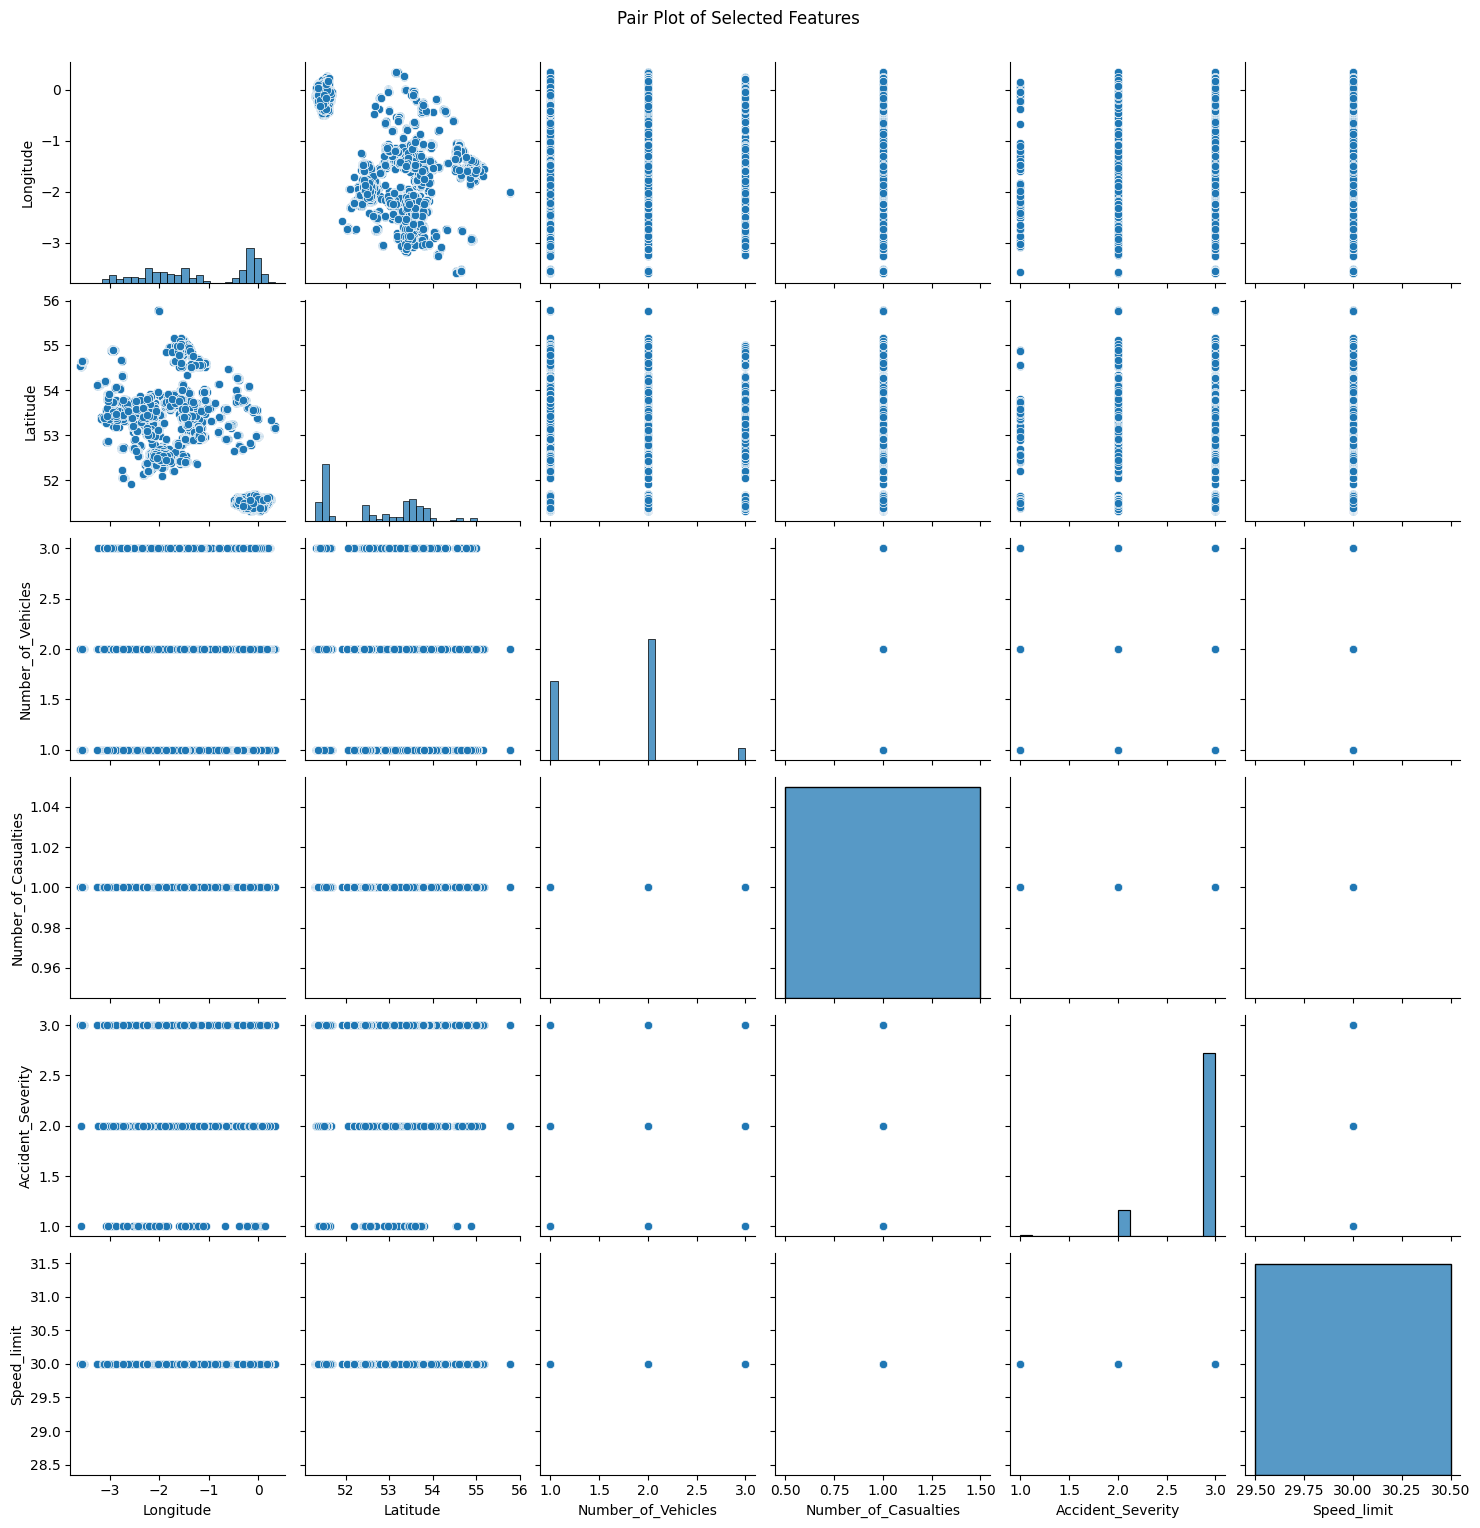

In [167]:
# Pair Plot of Selected Features
sns.pairplot(data=df[['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Accident_Severity','Speed_limit']])
plt.suptitle('Pair Plot of Selected Features',y=1.02)
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

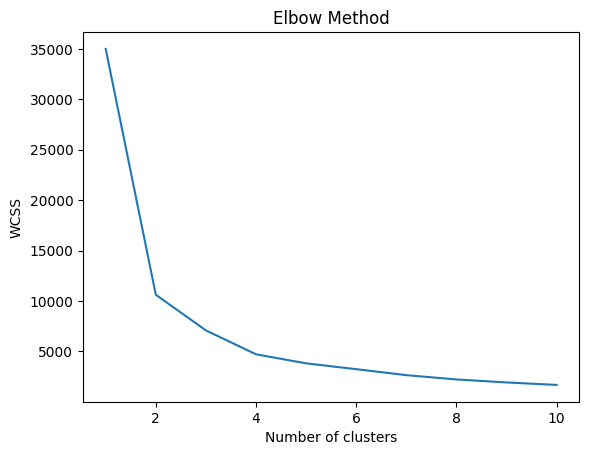

In [168]:
# using Elbow method to find the optimal value for n_clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=5)
    kmeans.fit(pca_X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [169]:
# the optimal value for n_clusters bases on elbow method is 2 and 4
# n_cluster = 2
# fit k-means model
kmeans = KMeans(n_clusters=2,random_state=5)
kmeans.fit(pca_X)

KMeans(n_clusters=2, random_state=5)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [170]:
# Predict the cluster labels
cluster_labels = kmeans.predict(pca_X)

# Calculate the silhouette score
score = silhouette_score(pca_X, cluster_labels)

In [173]:
print(f'Silhouette Score = {score}')

Silhouette Score = 0.5994554352908542


## Plot the data points with their predicted cluster center

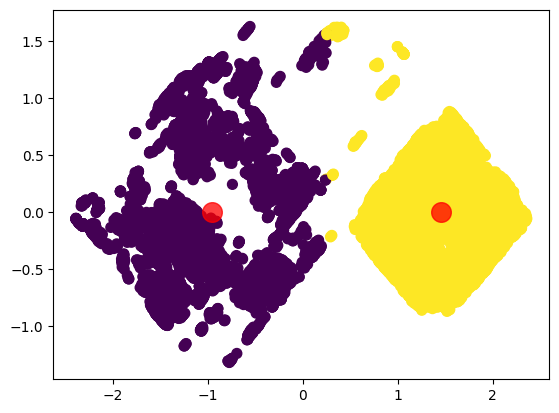

In [172]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=cluster_labels, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark the centroids
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

# Answer here:

**Justify Your Feature Selection:**
* The features selected for clustering include Longitude, Latitude, Number_of_Vehicles, Number_of_Casualties, Accident_Severity and Speed_limit
* These features are crucial for understanding the spatial distribution of accidents, and provides insight into the traffic density and its impact on accidents as it can help in understanding the severity

**Number of Clusters Choices:**
* The optimal number of clusters is determined using the elbow method.
* After using the elbow method we can see the best number of clusters is 2


**Evaluation**
* Plotting the clusters and their centers, we can see visually how well the clusters are separated
* The visual plot of clusters and their centers helps in understanding how distinct the clusters are from one another
* Silhouette have a good score 0.59 with 2 cluster , and 0.54 with 4 cluster



**Improvements and Recommendations**
* trying different Algorithm like DBSCAN could be applied to compare performance
* using other dimensionality reduction techniques like t-SNE 